<a href="https://colab.research.google.com/github/SadbinMohsin/Python-Project/blob/main/Personality%20Prediction/personality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [2]:
from google.colab import files

In [3]:
upload=files.upload()

Saving train.csv to train.csv


In [4]:
df = pd.read_csv('train.csv')

In [6]:
num_rows=df.shape[0]
num_cols=df.shape[1]

In [7]:
num_rows

709

In [ ]:
num_cols

8

In [8]:
df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively
...,...,...,...,...,...,...,...,...
704,Female,20,4,5,6,6,1,responsible
705,Male,18,6,3,1,5,5,dependable
706,Male,22,5,2,3,6,1,serious
707,Male,19,5,6,5,7,5,extraverted


In [9]:
df.info


<bound method DataFrame.info of      Gender  Age  openness  neuroticism  conscientiousness  agreeableness  \
0      Male   17         7            4                  7              3   
1      Male   19         4            5                  4              6   
2    Female   18         7            6                  4              5   
3    Female   22         5            6                  7              4   
4    Female   19         7            4                  6              5   
..      ...  ...       ...          ...                ...            ...   
704  Female   20         4            5                  6              6   
705    Male   18         6            3                  1              5   
706    Male   22         5            2                  3              6   
707    Male   19         5            6                  5              7   
708  Female   18         5            5                  7              6   

     extraversion Personality (Class label)

In [10]:
df.index

RangeIndex(start=0, stop=709, step=1)

In [11]:
df.columns

Index(['Gender', 'Age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion', 'Personality (Class label)'],
      dtype='object')

In [12]:
df.describe()

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,19.685472,5.019746,4.647391,4.643159,4.827927,4.409027
std,2.510672,1.519052,1.658673,1.703569,1.632564,1.567404
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,4.000000,3.000000,4.000000,3.000000
50%,19.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,21.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,28.000000,8.000000,8.000000,8.000000,8.000000,7.000000


In [13]:
df.isnull().sum()

Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (Class label)    0
dtype: int64

In [14]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

In [15]:
df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,1.0,17,7,4,7,3,2,extraverted
1,1.0,19,4,5,4,6,6,serious
2,0.0,18,7,6,4,5,5,dependable
3,0.0,22,5,6,7,4,3,extraverted
4,0.0,19,7,4,6,5,4,lively
...,...,...,...,...,...,...,...,...
704,0.0,20,4,5,6,6,1,responsible
705,1.0,18,6,3,1,5,5,dependable
706,1.0,22,5,2,3,6,1,serious
707,1.0,19,5,6,5,7,5,extraverted


In [16]:
import seaborn as sns

<Axes: xlabel='openness', ylabel='conscientiousness'>

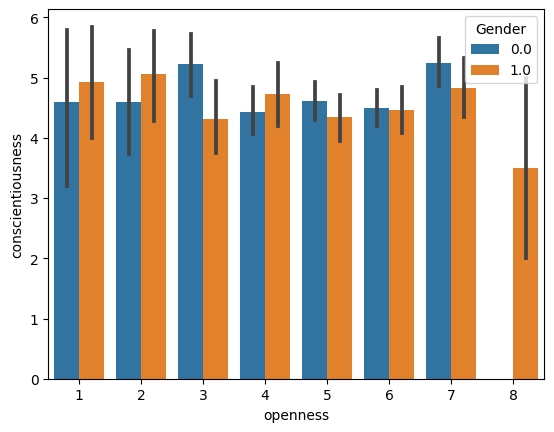

In [21]:
sns.barplot(x='openness',y='conscientiousness',hue='Gender',data=df)

In [22]:
upload=files.upload()

Saving test.csv to test.csv


In [ ]:
df_test=pd.read_csv('test.csv')

In [104]:
X_train =df.iloc[:, :-1].values
y_train = df.iloc[:, -1].values

In [105]:
X_train

array([[ 1., 17.,  7., ...,  7.,  3.,  2.],
       [ 1., 19.,  4., ...,  4.,  6.,  6.],
       [ 0., 18.,  7., ...,  4.,  5.,  5.],
       ...,
       [ 1., 22.,  5., ...,  3.,  6.,  1.],
       [ 1., 19.,  5., ...,  5.,  7.,  5.],
       [ 0., 18.,  5., ...,  7.,  6.,  5.]])

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Create a simple imputer to fill in missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Create a random forest classifier with 10 decision trees
rf = RandomForestClassifier(n_estimators=10, random_state=42)

# Fit the model to the training data
rf.fit(X_train_imputed, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

In [110]:
X_test =df_test.iloc[:, :-1]


In [111]:
X_test['Gender']=X_test['Gender'].map({'Male':1,'Female':0})

In [112]:
X_test=X_test.values

In [113]:
X_test

array([[ 0, 20,  7, ...,  9,  5,  5],
       [ 1, 17,  5, ...,  5,  2,  4],
       [ 0, 25,  5, ...,  7,  2,  4],
       ...,
       [ 1, 18,  7, ...,  6,  2,  7],
       [ 1, 23,  6, ...,  5,  4,  3],
       [ 0, 18,  5, ...,  3,  5,  6]])

In [114]:
# Import SimpleImputer from scikit-learn
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train and X_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [115]:
y_pred = rf.predict(X_test)

In [116]:
y_pred


array(['extraverted', 'lively', 'dependable', 'dependable', 'extraverted',
       'serious', 'extraverted', 'lively', 'responsible', 'lively',
       'serious', 'serious', 'responsible', 'responsible', 'responsible',
       'extraverted', 'lively', 'lively', 'dependable', 'dependable',
       'serious', 'serious', 'extraverted', 'dependable', 'serious',
       'dependable', 'dependable', 'serious', 'dependable', 'responsible',
       'serious', 'dependable', 'dependable', 'dependable', 'serious',
       'lively', 'extraverted', 'extraverted', 'extraverted', 'lively',
       'lively', 'lively', 'lively', 'serious', 'dependable',
       'extraverted', 'extraverted', 'extraverted', 'serious',
       'extraverted', 'extraverted', 'serious', 'extraverted',
       'responsible', 'extraverted', 'dependable', 'serious',
       'responsible', 'responsible', 'dependable', 'lively', 'serious',
       'dependable', 'extraverted', 'dependable', 'dependable',
       'dependable', 'serious', 'serious

In [118]:
#Assuming y_pred is a 1D numpy array of predictions
index = np.arange(len(y_pred)).reshape(-1, 1)
y_pred_with_index = np.hstack((index, y_pred.reshape(-1, 1)))


In [119]:
y_pred_with_index 

array([[0, 'extraverted'],
       [1, 'lively'],
       [2, 'dependable'],
       [3, 'dependable'],
       [4, 'extraverted'],
       [5, 'serious'],
       [6, 'extraverted'],
       [7, 'lively'],
       [8, 'responsible'],
       [9, 'lively'],
       [10, 'serious'],
       [11, 'serious'],
       [12, 'responsible'],
       [13, 'responsible'],
       [14, 'responsible'],
       [15, 'extraverted'],
       [16, 'lively'],
       [17, 'lively'],
       [18, 'dependable'],
       [19, 'dependable'],
       [20, 'serious'],
       [21, 'serious'],
       [22, 'extraverted'],
       [23, 'dependable'],
       [24, 'serious'],
       [25, 'dependable'],
       [26, 'dependable'],
       [27, 'serious'],
       [28, 'dependable'],
       [29, 'responsible'],
       [30, 'serious'],
       [31, 'dependable'],
       [32, 'dependable'],
       [33, 'dependable'],
       [34, 'serious'],
       [35, 'lively'],
       [36, 'extraverted'],
       [37, 'extraverted'],
       [38, 'extraverte

In [120]:
upload=files.upload()

Saving output.csv to output.csv


In [122]:
df_output=pd.read_csv('output.csv')

In [123]:
df_output

,Person No,Predicted Personality
0,1,dependable
1,2,serious
2,3,serious
3,4,serious
4,5,responsible
...,...,...
310,311,extraverted
311,312,serious
312,313,serious
313,314,extraverted


In [124]:
y_test = df_test.iloc[:, -1].values

In [126]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.29


In [127]:
import pandas as pd

# Read the output CSV file into a dataframe
df_output = pd.read_csv('output.csv')

# Compare with y_pred_with_index
if df_output.equals(y_pred_with_index):
    print("The output CSV file matches y_pred_with_index.")
else:
    print("The output CSV file does not match y_pred_with_index.")


The output CSV file does not match y_pred_with_index.
